In [1]:
import preprocessFERplus as preprocess
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data = preprocess.FERdata(
    'challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv'
)

reading csvfile from challenges-in-representation-learning-facial-expression-recognition-challenge/icml_face_data.csv


In [3]:
# result = data.get_df(mode='GNN',
#                      sample=True,
#                      sample_size=100,
#                      drawlandmarks=True,
#                      with_img=True)

result = data.get_df(mode='ANN',
                     drawlandmarks=True,
                     with_img=True, rotate=False, repos=False)

Generate df with config
 mode:ANN
 drawlandmarks:True
 mapping:False
 colormap:GRAY
 sample:False
 sample_size:35887
Prepare data to img


100%|██████████| 35887/35887 [00:23<00:00, 1549.79it/s]
INFO: Created TensorFlow Lite XNNPACK delegate for CPU.


Getting landmarks with mediapipe FaceMesh


100%|██████████| 35887/35887 [07:08<00:00, 83.77it/s] 

Distribution of Train: 
3    6949
6    4820
4    4320
2    3692
0    3561
5    3015
1     378
Name: target, dtype: int64
Distribution of Validation: 
3    866
6    586
4    569
2    459
0    419
5    390
1     51
Name: target, dtype: int64
Distribution of Test 
3    851
6    596
4    538
2    487
0    434
5    393
1     48
Name: target, dtype: int64


In [4]:
result.head(10)

,usage,feature,target,draw_img,img
0,test,"[[0.465291291475296, 0.7378618717193604, -0.08...",4,"[[[137, 137, 137], [127, 127, 127], [125, 125,...","[[[137, 137, 137], [127, 127, 127], [125, 125,..."
1,train,"[[0.6561192274093628, 0.7666499614715576, -0.0...",6,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
2,train,"[[0.5547119379043579, 0.7058619260787964, -0.0...",3,"[[[7, 7, 7], [7, 7, 7], [6, 6, 6], [6, 6, 6], ...","[[[7, 7, 7], [7, 7, 7], [6, 6, 6], [6, 6, 6], ..."
3,train,"[[0.5008580684661865, 0.7562679648399353, -0.1...",2,"[[[191, 191, 191], [249, 249, 249], [244, 244,...","[[[191, 191, 191], [249, 249, 249], [244, 244,..."
4,train,"[[0.33086222410202026, 0.6208022832870483, -0....",3,"[[[3, 3, 3], [3, 3, 3], [3, 3, 3], [1, 1, 1], ...","[[[3, 3, 3], [3, 3, 3], [3, 3, 3], [1, 1, 1], ..."
5,train,"[[0.4711848795413971, 0.859083354473114, -0.11...",5,"[[[19, 19, 19], [13, 13, 13], [13, 13, 13], [9...","[[[19, 19, 19], [13, 13, 13], [13, 13, 13], [9..."
6,train,"[[0.33299320936203003, 0.6679719686508179, -0....",6,"[[[40, 40, 40], [41, 41, 41], [49, 49, 49], [5...","[[[40, 40, 40], [41, 41, 41], [49, 49, 49], [5..."
7,train,"[[0.4060457944869995, 0.7815848588943481, -0.0...",1,"[[[22, 22, 22], [22, 22, 22], [21, 21, 21], [1...","[[[22, 22, 22], [22, 22, 22], [21, 21, 21], [1..."
8,train,"[[0.4404470920562744, 0.7171683311462402, -0.0...",5,"[[[255, 255, 255], [255, 255, 255], [255, 255,...","[[[255, 255, 255], [255, 255, 255], [255, 255,..."
9,train,"[[0.4921548068523407, 0.7383934259414673, -0.0...",0,"[[[105, 105, 105], [25, 25, 25], [17, 17, 17],...","[[[105, 105, 105], [25, 25, 25], [17, 17, 17],..."


In [5]:
FERclassName = [
    'Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral'
]

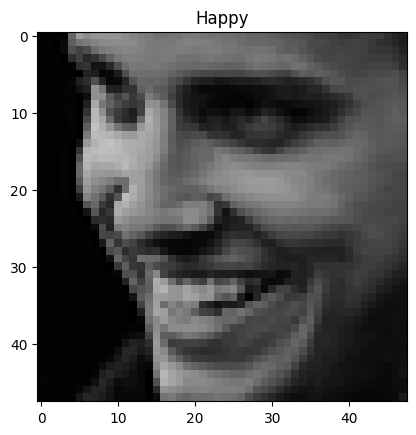

In [32]:
sample = result.iloc[4]
label = FERclassName[sample['target']]
img = sample['img']
plt.title(label)
plt.imshow(img, cmap='gray')

In [33]:
mesh_img = sample['draw_img']

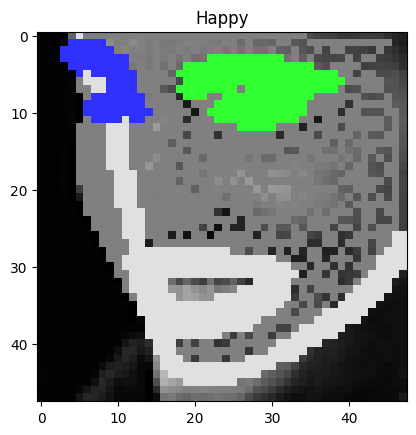

In [34]:
plt.title(label)
plt.imshow(mesh_img)

In [35]:
mesh = sample['feature']

In [36]:
mesh = np.array(mesh).reshape(478, 3)


In [37]:
def plot3dmesh(mesh):
    ax = plt.figure().add_subplot(projection='3d')
    ax.plot_trisurf(mesh[:, 0],
                    mesh[:, 1],
                    mesh[:, 2],
                    cmap='viridis',
                    edgecolor='none')
    ax.view_init(270, 180, 90)
    ax.set(title=label, xlabel='X', ylabel='Y', zlabel='Z')


In [38]:
def re_pos(mesh):
    # print(f'shift from: {mesh[1]}')
    origin = mesh[1] - np.array([0, 0, 0])
    mesh = mesh - origin
    return mesh

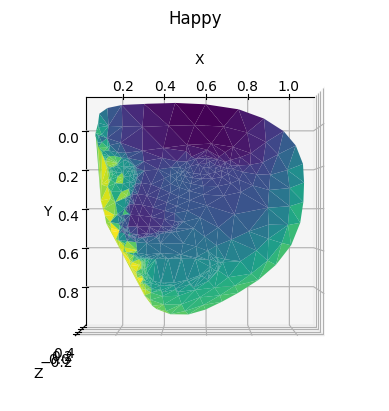

In [39]:
plot3dmesh(mesh)

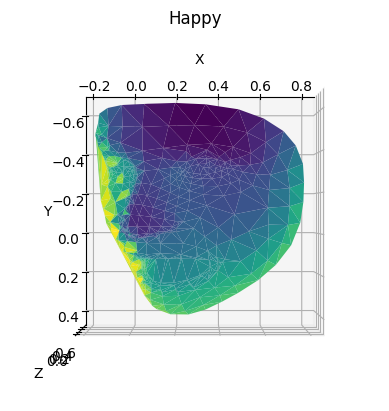

In [40]:
plot3dmesh(re_pos(mesh))

[Text(0.5, 0.92, 'Happy'),
 Text(0.5, 0, 'X'),
 Text(0.5, 0.5, 'Y'),
 Text(0.5, 0, 'Z')]

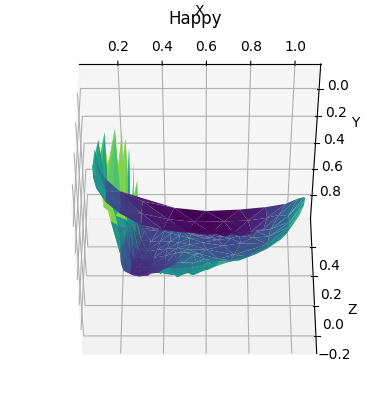

In [41]:
ax = plt.figure().add_subplot(projection='3d')
ax.plot_trisurf(mesh[:, 0],
                mesh[:, 1],
                mesh[:, 2],
                cmap='viridis',
                edgecolor='none')
ax.view_init(320, 270, 0)
ax.set(title=label, xlabel='X', ylabel='Y', zlabel='Z')


In [46]:
def quiver_plot(ax,origin,u,v,w,u_color='Red', v_color='Blue', w_color='Green',dash=False):
    ax.quiver(origin[0],origin[1],origin[2],u[0],u[1],u[2],length=0.7,color=u_color,normalize=True, linestyle='dashed' if dash else 'solid')
    ax.quiver(origin[0],origin[1],origin[2],v[0],v[1],v[2],length=0.7,color=v_color,normalize=True, linestyle='dashed' if dash else 'solid')
    ax.quiver(origin[0],origin[1],origin[2],w[0],w[1],w[2],length=0.7,color=w_color,normalize=True, linestyle='dashed' if dash else 'solid')
    return ax

In [47]:
import numpy as np
from scipy.spatial.transform import Rotation as R
def unit_vector(vector):
    """ Returns the unit vector of the vector.  """
    return vector / np.linalg.norm(vector)

def rot(mesh, u,v,w, x,y,z):
    r = R.from_matrix([u,v,w])
    ref_r = R.from_matrix([x,y,z])
    rotation = ref_r * r
    # mesh = r.apply(mesh)
    # mesh = ref_r.apply(mesh)
    mesh = rotation.apply(mesh)
    # print(r.as_euler('xyz', degrees=True))
    return mesh

def get_ref(mesh):
    p0 = mesh[1]
    p1 = mesh[5]
    p2 = mesh[44]
    p3 = mesh[274]
    v1 = p2 - p1
    v2 = p3 - p1
    v3 = p0 - p1
    v4 = p0 - mesh[4]
    w = unit_vector(np.cross(v1, v2))
    ref = unit_vector(np.cross(v3, v4))
    v = unit_vector(np.cross(w, ref))
    u = unit_vector(np.cross(v, w))
    return u,v,w

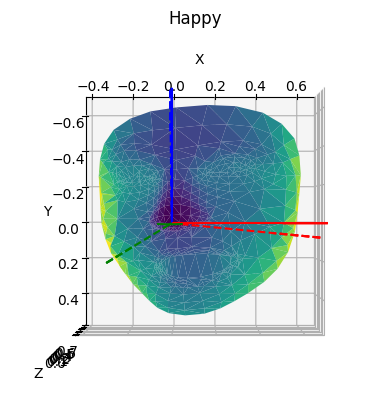

In [51]:
def rotate_mesh(mesh):
    mesh = re_pos(mesh)
    u,v,w = get_ref(mesh)
    x = np.array([1., 0., 0.])
    y = np.array([0., -1., 0.])
    z = np.array([0., 0., -1.])
    mesh = rot(mesh, u,v,w, x,y,z)
    ax = plt.figure().add_subplot(projection='3d')
    ax.set(title=label, xlabel='X', ylabel='Y', zlabel='Z')
    # ax.scatter3D(mesh[:, 0], mesh[:, 1], mesh[:, 2])
    ax.plot_trisurf(mesh[:, 0], mesh[:, 1], mesh[:, 2], cmap='viridis', edgecolor='none')
    ax = quiver_plot(ax, np.zeros(3), x, y, z)
    ax = quiver_plot(ax, np.zeros(3), u, v, w, dash=True)
    ax.view_init(270, 180, 90)
    # ax.view_init(320, 270, 0)

rotate_mesh(mesh)

In [ ]:
# %%timeit
# rotate_mesh(mesh)

In [253]:
preprocess.FERclassName[:-1]

['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']